# Основная информация по отчету
### ФИО - Мирасов Константин Владимирович
### ИСУ - 466716
### Практический поток - ИИИ 2.1

## Ход выполнения работы
#### 1. Рассчитал истинную геометрическую вероятность как отношение соответствующих площадей.
#### 2. При помощи генератора случайных чисел разместил точки в Ω (пространство элементарных исходов) и определил их принадлежность A(r) (окружность радиуса r).
#### 3. Построил график pˆ(n), где pˆ - доля точек, которые попали в круг, а n - количество точек.
#### 4. Построил график ε(n) = |pˆ(n) − p| для анализа изменения ошибки оценки геометрической вероятности

## Импортируем необходимые библиотеки
При выполнении лабораторной работы были использованы библиотеки: **numpy** (для быстрых математических вычислений) и **matplotlib** (для визуализации полученных данных)

In [89]:
import numpy as np
import matplotlib.pyplot as plt

### Необходимые константы
В дальнейшем требуются некоторые константы, в нашем случае минимальное количество радиусов для наших окружностей, а также скаляр A, который необходим для правильного расставления границ промежутков и длинны сторон квадрата (*сторона квадрта задается как 2 * A*). ***N*** - количество точек


In [90]:
MIN_COUNT_RADII = 5
A_SCALAR = 2
N = 10000

### Задание последовательности радиусов
Наша последовательность радиусов окружностей (***MIN_COUNT_RADII*** штук) задается по формуле radii[i] = A_SCALAR / (i + 1)


In [91]:
radii = np.array([A_SCALAR / (i + 1) for i in range(MIN_COUNT_RADII)])

### Расчёт истинной геометрической вероятности как отношение соотвествующих площадей
Площадь окружности = ***PI * R^2***, где PI - число пи (3.1415...) и R - радиус окружности

In [92]:
true_geom_probability = (np.pi * radii ** 2) / ((2 * A_SCALAR) ** 2)

### Применение метода Монте-Карло
Данный метод заключается в том, что мы можем взять N точек и независимо друг от друга с помощью генератора случайных значений разместить в размеченной плоскости. В нашем случае у нас есть квадрат со сторонами 2 * A_SCALAR и окружность с радиусом radii[i] = A_SCALAR / (i + 1). Благодаря этим точкам мы можем определить приближенное значение истинной геометрической вероятности по формуле (P / N), где P - количество точек попавшие в необходимую фигуру (окружность), далее мы покажем как количество наших точек влияет на точность метода Монте-Карло

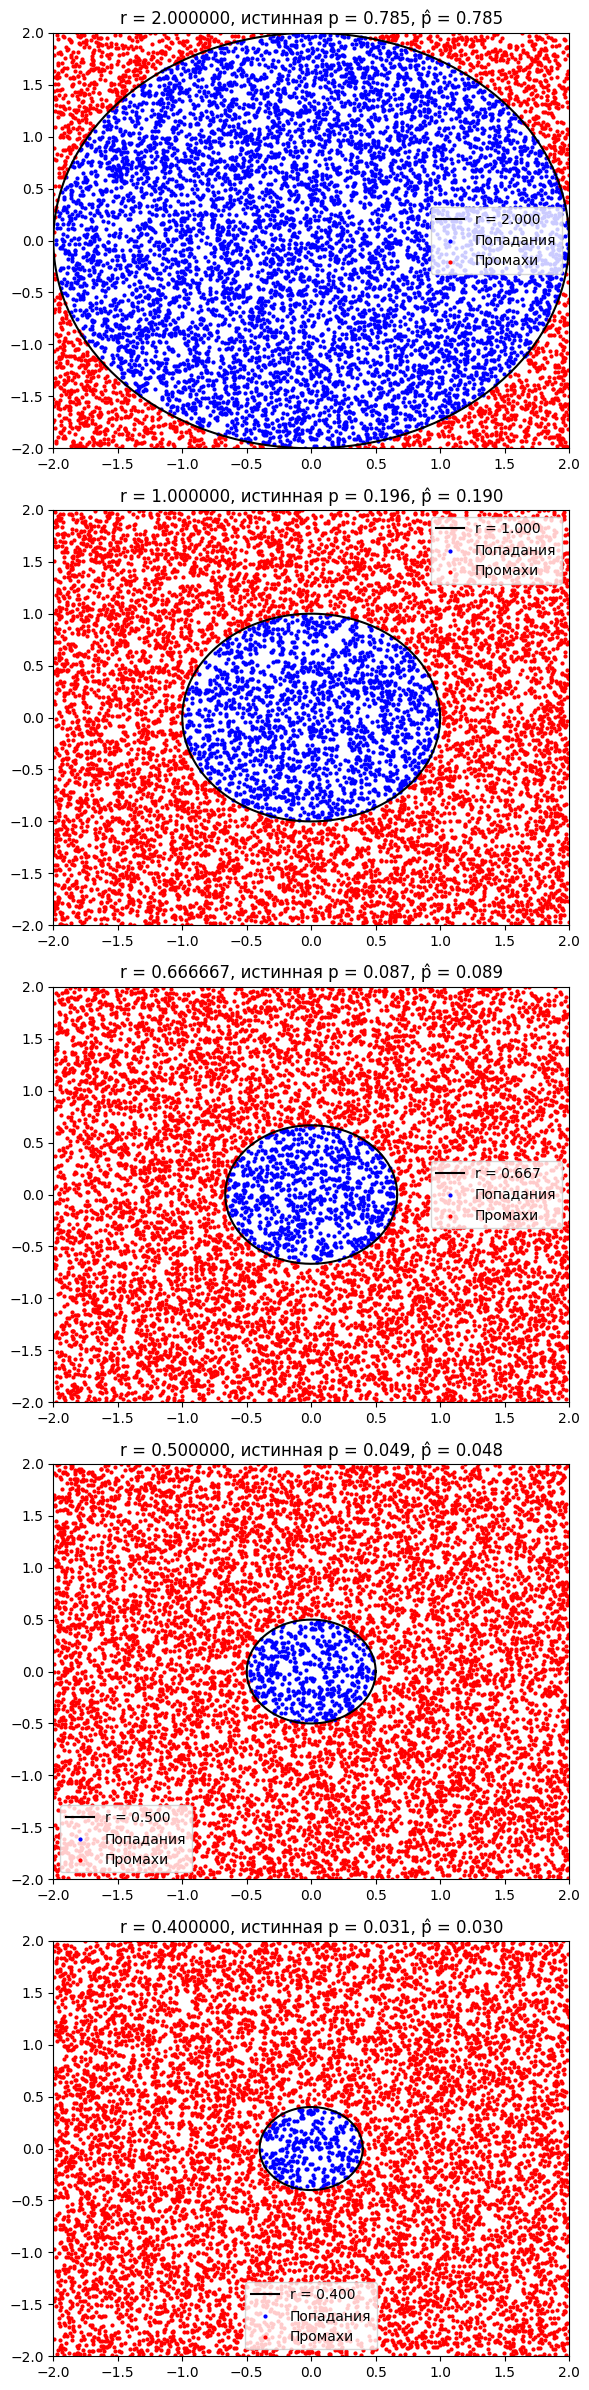

In [93]:
random_generator = np.random.default_rng()

fig, axs = plt.subplots(nrows=MIN_COUNT_RADII, ncols=1, figsize=(6, 24))

for idx, r in enumerate(radii):
    theta = np.linspace(0, 2 * np.pi, 300)
    x_circle = r * np.cos(theta)
    y_circle = r * np.sin(theta)
    axs[idx].plot(x_circle, y_circle, "k-", label=f"r = {r:.3f}")

    rand_x = random_generator.uniform(-A_SCALAR, A_SCALAR, N)
    rand_y = random_generator.uniform(-A_SCALAR, A_SCALAR, N)

    mask_inside = (rand_x ** 2 + rand_y ** 2) <= r ** 2
    hit_count = np.sum(mask_inside)

    p_hat = hit_count / N

    axs[idx].scatter(rand_x[mask_inside], rand_y[mask_inside], c="b", s=4, label="Попадания")
    axs[idx].scatter(rand_x[~mask_inside], rand_y[~mask_inside], c="r", s=4, label="Промахи")
    axs[idx].set_xlim(-A_SCALAR, A_SCALAR)
    axs[idx].set_ylim(-A_SCALAR, A_SCALAR)
    axs[idx].set_title(f"r = {r:3f}, истинная p = {true_geom_probability[idx]:.3f}, p̂ = {p_hat:.3f}")
    axs[idx].legend()

plt.tight_layout()
plt.show()

### Построим график pˆ(n), где pˆ — доля точек, которые попали в круг, а n — количество точек
Выбирая значения от 1000 до 256000 мы сможем показать, что чем больше у нас точек, тем точней метод Монте-Карло показывает вероятность => при n -> бесконечности мы практически получаем нашу истинную геометрическую вероятность

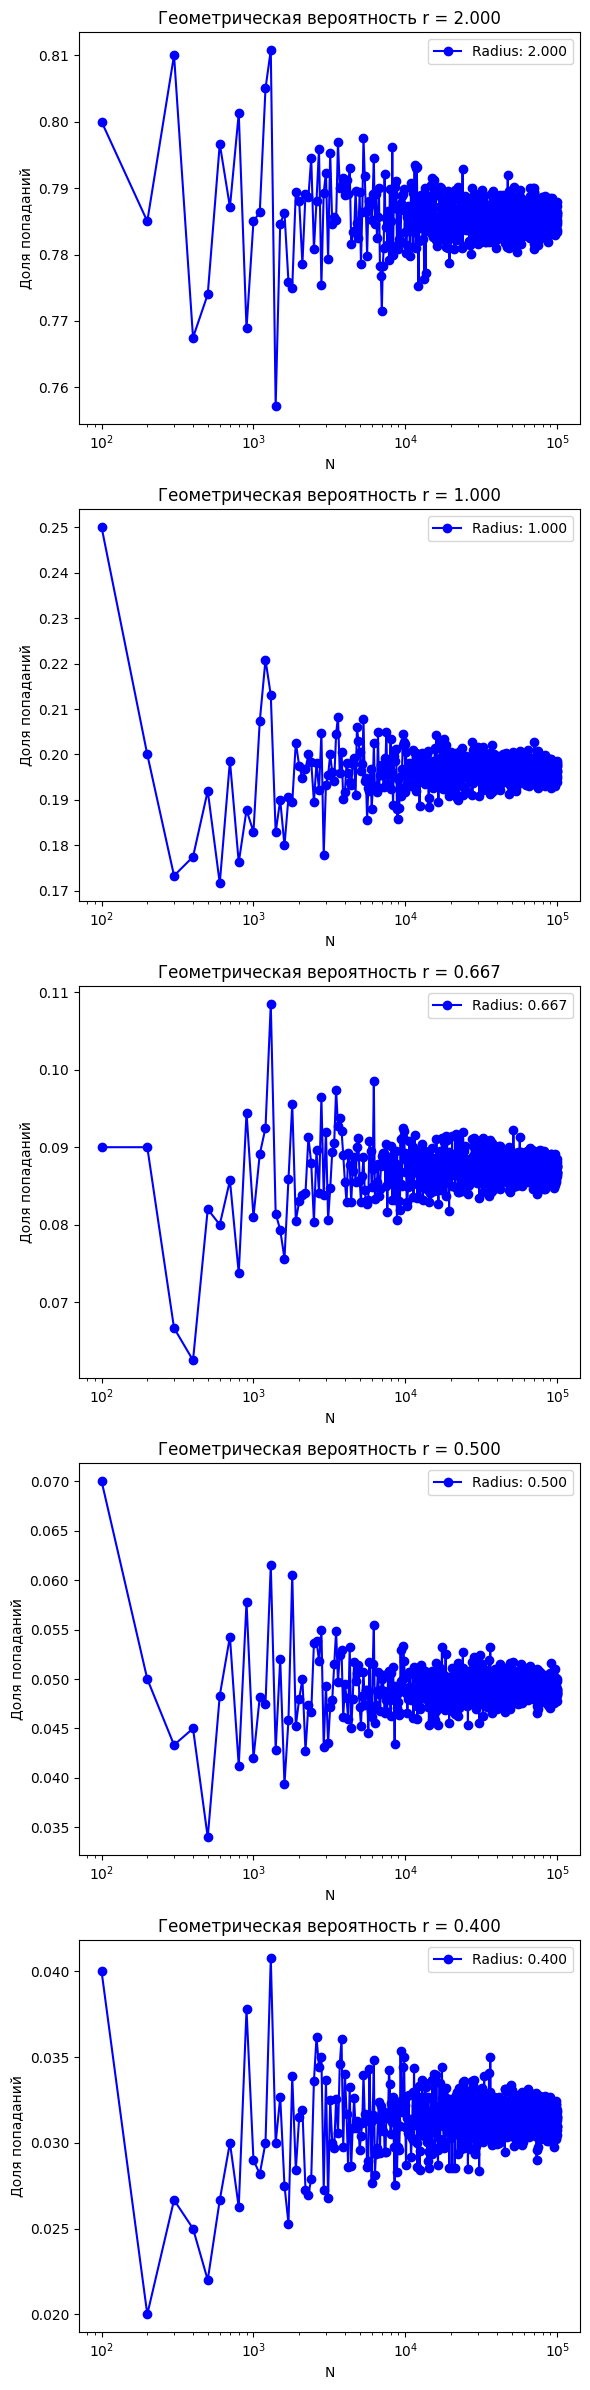

In [94]:
n_test_array = [x for x in range(100, 100000, 100)]
test_hit_point_array = np.zeros((len(n_test_array), MIN_COUNT_RADII))

for j, n in enumerate(n_test_array):
    rand_x = random_generator.uniform(-A_SCALAR, A_SCALAR, n)
    rand_y = random_generator.uniform(-A_SCALAR, A_SCALAR, n)

    for i, r in enumerate(radii):
        mask_inside = rand_x ** 2 + rand_y ** 2 <= r ** 2
        test_hit_point_array[j, i] = np.sum(mask_inside) / n

fig, axs = plt.subplots(nrows=MIN_COUNT_RADII, ncols=1, figsize=(6, 24))

for i in range(MIN_COUNT_RADII):
    axs[i].plot(n_test_array, test_hit_point_array[:, i], marker="o", color="b", label=f"Radius: {radii[i]:.3f}")
    axs[i].set_xlabel("N")
    axs[i].set_ylabel("Доля попаданий")
    axs[i].set_xscale("log")
    axs[i].set_title(f"Геометрическая вероятность r = {radii[i]:.3f}")
    axs[i].legend()

plt.tight_layout()
plt.show()

### Построим график к ε(n) = |pˆ(n)−p| для анализа изменения ошибки оценки геометрической вероятности
При нашей выборки N = {1000...256000} мы можем увидеть, что наша ошибка оценки -> 0 при n -> к бесконечности

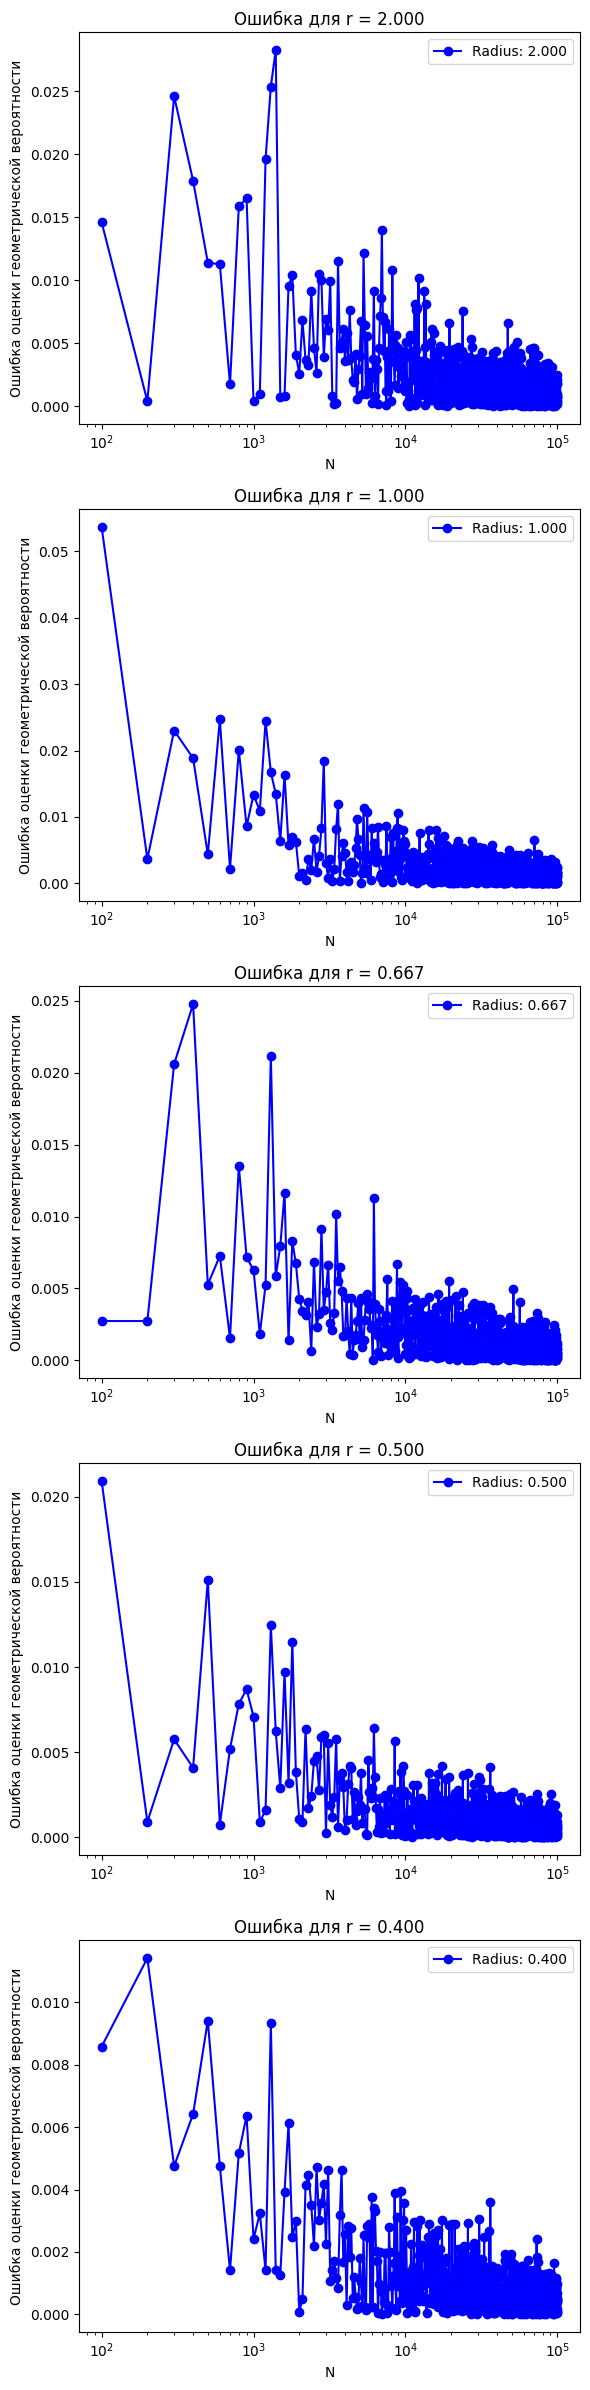

In [95]:
fig, axs = plt.subplots(nrows=MIN_COUNT_RADII, ncols=1, figsize=(6, 24))

for i in range(MIN_COUNT_RADII):
    x_vals = np.array(n_test_array)
    y_vals = np.abs(test_hit_point_array[:, i] - true_geom_probability[i])

    axs[i].plot(x_vals, y_vals, marker="o", color="b", label=f"Radius: {radii[i]:.3f}")
    axs[i].set_xlabel("N")
    axs[i].set_ylabel("Ошибка оценки геометрической вероятности")
    axs[i].set_title(f"Ошибка для r = {radii[i]:.3f}")
    axs[i].set_xscale("log")
    axs[i].legend()

plt.tight_layout()
plt.show()

### Для каждого радиуса вычислим необходимое количество случайных точек N, необходимых для достижения точности ε_i. Построим график зависимости N(ε)
На этом этапе мы просто найдем минимальное N для каждой точности, которую мы укажем. Данная точность показывает, насколько мы хотим точное значение нашей ошибки оценки геометрической вероятности

Epsilons: [0.1, 0.01, 0.001, 0.0001]
n_results:
 [[4.000e+00 9.000e+00 5.243e+03 5.901e+03]
 [4.000e+00 1.500e+01 5.100e+01 2.140e+02]
 [6.000e+00 1.100e+01 1.360e+02 1.720e+02]
 [1.000e+00 9.700e+01 1.200e+02 1.220e+02]
 [1.000e+00 2.500e+01 3.100e+01 2.540e+02]]


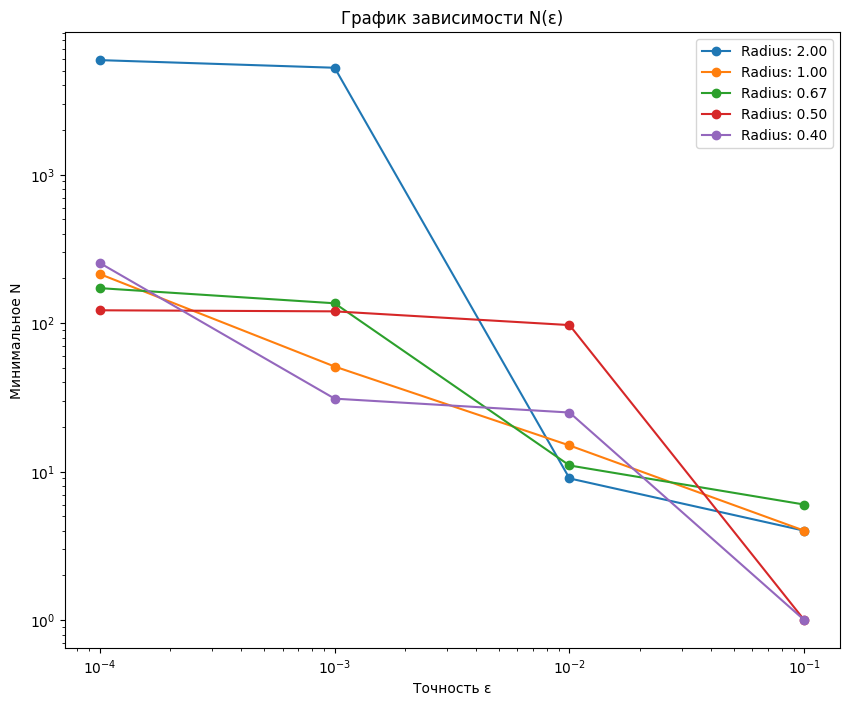

In [96]:
epsilons = [1e-1, 1e-2, 1e-3, 1e-4]
max_n = 100000
batch_size = 1000

n_results = np.zeros((len(radii), len(epsilons)))

for idx, r in enumerate(radii):
    rand_x = random_generator.uniform(-A_SCALAR, A_SCALAR, max_n)
    rand_y = random_generator.uniform(-A_SCALAR, A_SCALAR, max_n)
    inside_circle = (rand_x ** 2 + rand_y ** 2) <= r ** 2
    cumulative_hits = np.cumsum(inside_circle)
    cumulative_probs = cumulative_hits / np.arange(1, max_n + 1)

    true_p = true_geom_probability[idx]

    for j, eps in enumerate(epsilons):
        errors = np.abs(cumulative_probs - true_p)
        valid_indices = np.where(errors <= eps)[0]
        if valid_indices.size > 0:
            n_results[idx, j] = valid_indices[0] + 1
        else:
            n_results[idx, j] = np.nan

plt.figure(figsize=(10, 8))
for idx, r in enumerate(radii):
    plt.plot(epsilons, n_results[idx], marker="o", label=f"Radius: {r:.2f}")

print("Epsilons:", epsilons)
print("n_results:\n", n_results)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Точность ε")
plt.ylabel("Минимальное N")
plt.title("График зависимости N(ε)")
plt.legend()
plt.show()

## Заключение
##### Главным выводом в данной лабораторной работе является то, что мы поняли как можно вычислять очень приближенное значение геометрической вероятности. Причем это работает для любых объектов, в нашем случае были довольно простые геометрические объекты, у которых легко считать площадь, но метод Монте-Карло позволяет вычислять геометрическую вероятность для абсолютно любых объектов. Чем больше точек мы добавляем, тем точней получается наше значение вероятности. Тут стоит выбор, если нужно быстро посчитать и не нужно очень точное значение, мы можем брать небольшое количество точек и наоборот, большое количество точек если нам не важна скорость обработки